<a href="https://colab.research.google.com/github/Akshay069/Netflix-Movies-And-TV-shows-Clustering/blob/main/Copy_of_NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

---



---



This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

### <b>In this  project, you are required to do </b>
1. Exploratory Data Analysis 

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features



##**Data Overview**


---



In [75]:
# Importing Required liabraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [76]:
# Mounting Google drive.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [77]:
# Reading CSV file using Pandas DataFrame.
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AlmaBetter/Machine Learning/Unsupervised Learning /Unsupervised Capstone Project/Copy of NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

In [78]:
# Seeing datset for the fisrt time.
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [79]:
# Last five observations of the dataset.
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


In [80]:
# Shape of the dataset.
print('- There are total of', df.shape[0], 'number of rows in the dataset')
print('- There are total of', df.shape[1], 'number of columns in the dataset')

- There are total of 7787 number of rows in the dataset
- There are total of 12 number of columns in the dataset


In [81]:
# Exploring the total 12 columns name in the dataset.
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

###**Attribute Information**


1.   **show_id :** Unique ID for every Movie / Tv Show \
2.   **type :** Identifier - A Movie or TV Show \
3.   **title :** Title of the Movie / Tv Show \
4.   **director :** Director of the Movie \
5.   **cast :** Actors involved in the movie / show \
6.   **country :** Country where the movie / show was produced \
7.   **date_added :** Date it was added on Netflix \
8.   **release_year :** Actual Releaseyear of the movie / show \
9.   **rating :** TV Rating of the movie / show \
10.  **duration :** Total Duration - in minutes or number of seasons \
11.  **listed_in :** Genres of content \
12.  **description:** The Summary description of cotent











* Listed_in is nothing but a genre so, for better understanding let's change its name to genres.

In [82]:
# Changing listed_in to genres.
df.rename(columns = {"listed_in":"genres"},inplace = True)
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'genres', 'description'],
      dtype='object')

In [83]:
# Let's see the summary information of the dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  genres        7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


* Most of the variables are Qualitative i.e Categorical.
* Above we can see that date_added is in string also in the 'October 19, 2020' formate Lets take year and month out for further EDA.
* But before doing any changes in the dataset let's make its copy.
* Variable 'show_id' is not important for us so, will drop this variable.

##**Data Cleaning**

In [84]:
# Creating copy of the dataset so that I could make changes on it.
Netflix_df = df.copy()

* As disscused above will extract and make new column 'Added Year' and 'Added Month' from column 'date_added'.

In [85]:
#adding columns of month and year of addition
Netflix_df['added_year'] = pd.DatetimeIndex(Netflix_df['date_added']).year
Netflix_df['added_month'] = pd.DatetimeIndex(Netflix_df['date_added']).month_name()
Netflix_df.drop(columns='show_id', inplace=True)
Netflix_df.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,genres,description,added_year,added_month
0,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020.0,August
1,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016.0,December
2,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018.0,December
3,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017.0,November
4,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020.0,January


In [86]:
# Checking for the duplicate values.
df.duplicated().sum()

0

* There are no duplicates present in our dataset.

In [87]:
# Checking of null values in the dataset.
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
genres             0
description        0
dtype: int64

* We can see that there are null values present in four colomns which needed to be treated will treat them further in this section.

<BarContainer object of 12 artists>

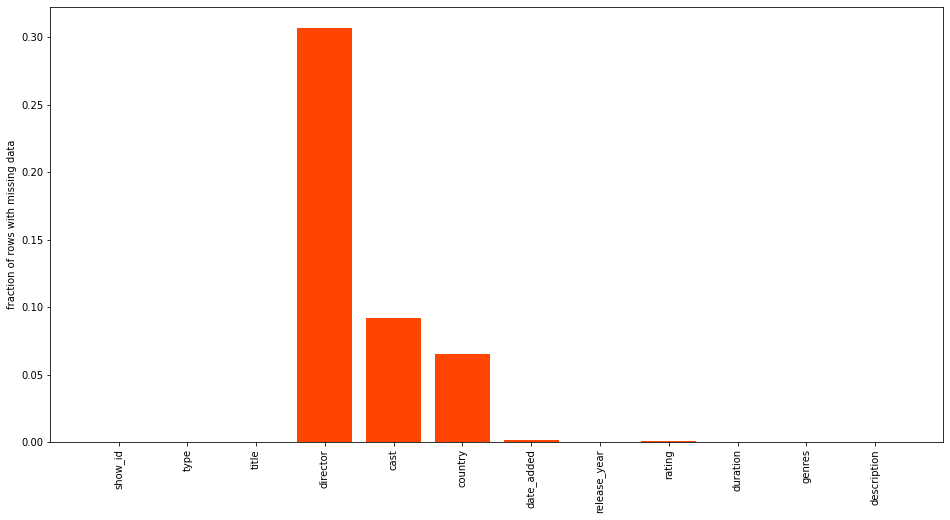

In [88]:
# Let's take visual of it.
null_counts = df.isnull().sum()/len(df)
plt.figure(figsize=(16,8))
plt.xticks(np.arange(len(null_counts)),null_counts.index,rotation='vertical')
plt.ylabel('fraction of rows with missing data')
plt.bar(np.arange(len(null_counts)),null_counts, color='orangered')

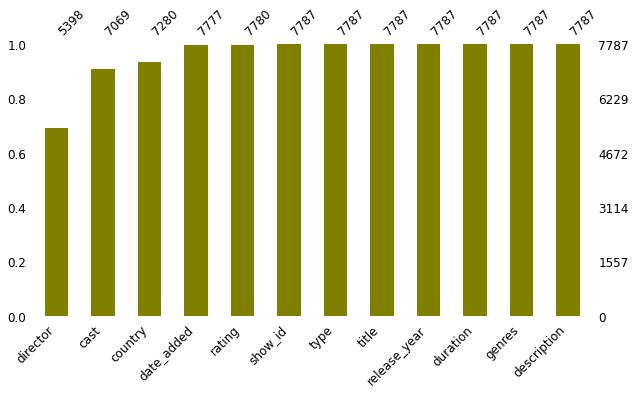

In [89]:
# Visualization null value distribution.
import missingno as msno
msno.bar(df, log=False, sort='ascending', figsize=(10,5), fontsize=12, color='olive')

* We can clearly see that there are null values present in some of the features including director, cast, country, date_added and rating.
* We have almost 30% of values as null in director so instead of dropping I'm  replacing  those values with string 'Not Known' same will do for column cast and country as these are in high numbers.
* I'm dropping other null values from column date_added and rating as there null value count is very less.

In [90]:
# Treating null values as disscused.
Netflix_df['country'] = Netflix_df['country'].fillna('Not Known')
Netflix_df['director'] = Netflix_df['director'].fillna('Not Known') 
Netflix_df['cast'] = Netflix_df['cast'].fillna('Not Known')
Netflix_df.dropna(subset=['date_added','rating'],inplace=True)

In [91]:
# Checking for results.
Netflix_df.isnull().sum()

type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
genres          0
description     0
added_year      0
added_month     0
dtype: int64

In [92]:
Netflix_df[Netflix_df['country'].str.endswith(",")]

,type,title,director,cast,country,date_added,release_year,rating,duration,genres,description,added_year,added_month
1402,Movie,City of Joy,Madeleine Gavin,Not Known,"United States,","September 7, 2018",2018,TV-MA,77 min,Documentaries,Women who've been sexually brutalized in war-t...,2018.0,September
2315,Movie,Funan,Denis Do,"Bérénice Bejo, Louis Garrel, Colette Kieffer, ...","France, Belgium, Luxembourg, Cambodia,","July 18, 2020",2018,TV-14,87 min,"Dramas, International Movies",Separated from their young son during the brut...,2020.0,July
2827,Movie,Hotel Pacific,Janusz Majewski,"Marek Kondrat, Roman Wilhelmi, Roman Skamene, ...","Poland,","October 1, 2019",1975,TV-MA,96 min,"Classic Movies, Dramas, International Movies",A motivated teen strives to rise from dishwash...,2019.0,October
7433,Movie,Virunga,Orlando von Einsiedel,Not Known,"United Kingdom,","November 7, 2014",2014,TV-MA,100 min,"Documentaries, International Movies",The Oscar-nominated true story of the rangers ...,2014.0,November


* I obeserved some that there are some entries where there are comma present in the end of the country name.
* In above we can see that there are few entries are there will fix them on the basis of own understanding of genres by oberving the other parameters.

In [93]:
# As discussed above let's fill these values with related genres.
Netflix_df.loc[1402,'country'] = 'United States'
Netflix_df.loc[2315,'country'] = 'France, Belgium, Luxembourg, Cambodia'
Netflix_df.loc[2827,'country'] = 'Poland'
Netflix_df.loc[7433,'country'] = 'United Kingdom'

In [94]:
# Let's check again.
Netflix_df[Netflix_df['country'].str.endswith(",")]

,type,title,director,cast,country,date_added,release_year,rating,duration,genres,description,added_year,added_month


* Ohh yeah they gone.

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  genres        7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [96]:
# Lets figure out all the categorical variables in
Categorical_Features = [feature for feature in Netflix_df.columns if Netflix_df[feature].dtypes == 'O']
Categorical_Features

['type',
 'title',
 'director',
 'cast',
 'country',
 'date_added',
 'rating',
 'duration',
 'genres',
 'description',
 'added_month']

In [97]:
for feature in Categorical_Features:
  print('The variable is {} and number of categories are {}'.format(feature,len(Netflix_df[feature].unique())))

The variable is type and number of categories are 2
The variable is title and number of categories are 7770
The variable is director and number of categories are 4048
The variable is cast and number of categories are 6818
The variable is country and number of categories are 679
The variable is date_added and number of categories are 1563
The variable is rating and number of categories are 14
The variable is duration and number of categories are 216
The variable is genres and number of categories are 491
The variable is description and number of categories are 7752
The variable is added_month and number of categories are 12


* Here, We have seperated all the categorical values to do analysis of them.
* Also there are large number of Nominal categorical variables excepting 'Type', 'Rating', 'Gneres', 'added_month' are ordinal type of categorical variables so will analyse these feature one by one.

In [98]:
# all Unique genres.
all_genres = ""
for i in Netflix_df['genres'].value_counts().index.values:
  all_genres  = all_genres + "," + i
all_genres = all_genres.split(',')
genres = [s.strip() for s in all_genres]
genres = np.unique(genres)
genres = list(genres)
print("Combined unique Genres' List : \n ")
genres.pop(0)
genres

Combined unique Genres' List : 
 


['Action & Adventure',
 'Anime Features',
 'Anime Series',
 'British TV Shows',
 'Children & Family Movies',
 'Classic & Cult TV',
 'Classic Movies',
 'Comedies',
 'Crime TV Shows',
 'Cult Movies',
 'Documentaries',
 'Docuseries',
 'Dramas',
 'Faith & Spirituality',
 'Horror Movies',
 'Independent Movies',
 'International Movies',
 'International TV Shows',
 "Kids' TV",
 'Korean TV Shows',
 'LGBTQ Movies',
 'Movies',
 'Music & Musicals',
 'Reality TV',
 'Romantic Movies',
 'Romantic TV Shows',
 'Sci-Fi & Fantasy',
 'Science & Nature TV',
 'Spanish-Language TV Shows',
 'Sports Movies',
 'Stand-Up Comedy',
 'Stand-Up Comedy & Talk Shows',
 'TV Action & Adventure',
 'TV Comedies',
 'TV Dramas',
 'TV Horror',
 'TV Mysteries',
 'TV Sci-Fi & Fantasy',
 'TV Shows',
 'TV Thrillers',
 'Teen TV Shows',
 'Thrillers']

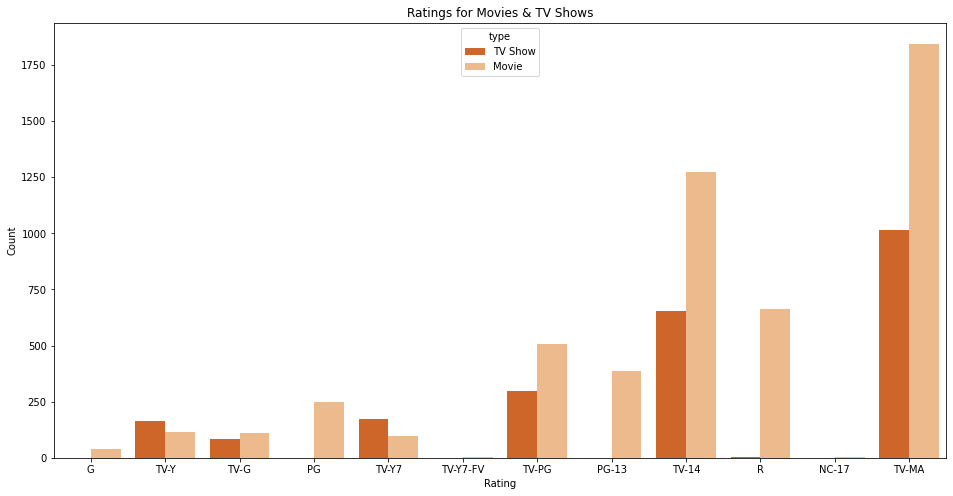

In [111]:
# Rating for Movies and TV shows
order = ['G', 'TV-Y', 'TV-G', 'PG', 'TV-Y7', 'TV-Y7-FV', 'TV-PG', 'PG-13', 'TV-14', 'R', 'NC-17', 'TV-MA']
plt.figure(figsize=(16,8))
g = sns.countplot(Netflix_df['rating'], hue=Netflix_df.type, order=order, palette="Oranges_r");
plt.title("Ratings for Movies & TV Shows")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

* TV-MA and TV-14 these two rating are higher in number.

In [112]:
# Changing the values in the rating column.
rating_map = {'TV-MA':'Adults',
              'R':'Adults',
              'PG-13':'Teens',
              'TV-14':'Young Adults',
              'TV-PG':'Older Kids',
              'NR':'Adults',
              'TV-G':'Kids',
              'TV-Y':'Kids',
              'TV-Y7':'Older Kids',
              'PG':'Older Kids',
              'G':'Kids',
              'NC-17':'Adults',
              'TV-Y7-FV':'Older Kids',
              'UR':'Adults'}

Netflix_df['rating'].replace(rating_map, inplace = True)
Netflix_df['rating'].unique()

array(['Adults', 'Teens', 'Young Adults', 'Older Kids', 'Kids'],
      dtype=object)

##**Exploratory Data Analysis**

###**1. Univariate Analysis.**

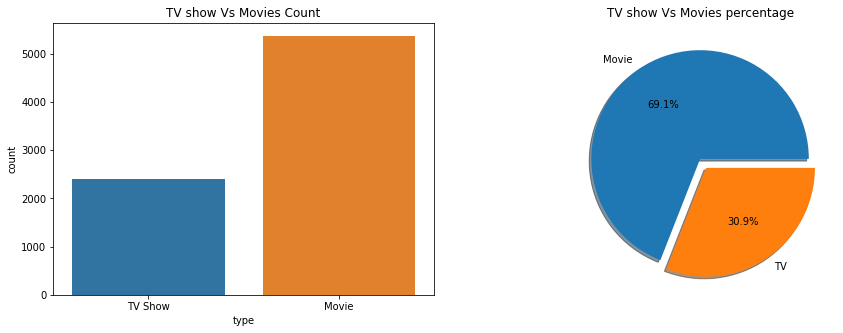

In [99]:
# Let's see which type has more content
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.countplot(Netflix_df['type'])
plt.title('TV show Vs Movies Count')
plt.subplot(122)
plt.pie(df['type'].value_counts(),labels=['Movie', 'TV'], explode = (0,0.1), autopct = '%1.1f%%', shadow=True)
plt.title('TV show Vs Movies percentage')
plt.show()

* Number of movies are more as compared to TV shows on netflix.

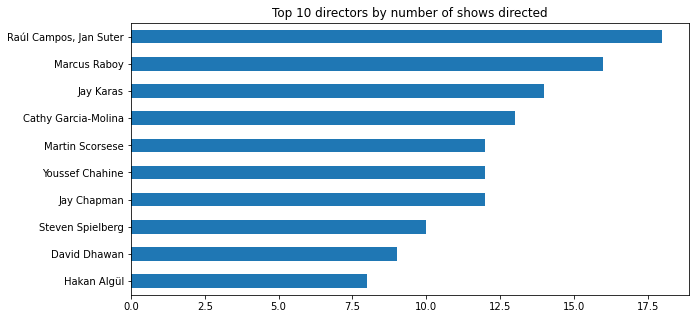

In [118]:
# Top 10 directors in the dataset
plt.figure(figsize=(10,5))
Netflix_df[~(Netflix_df['director']=='Not Known')].director.value_counts().nlargest(10).sort_values(ascending= True).plot(kind='barh')
plt.title('Top 10 directors by number of shows directed')
plt.show()

* Raul Campos and Jan Suter together have directed almost 18 movies / TV shows, higher than anyone in the dataset.

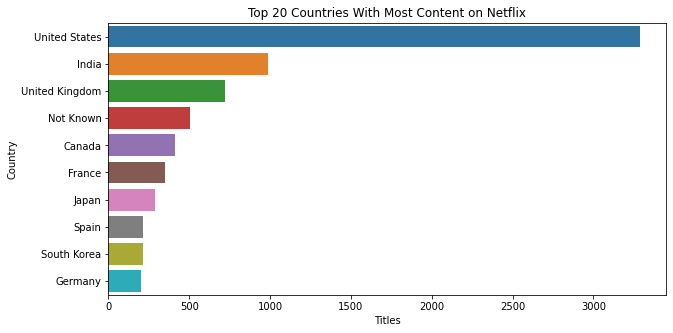

In [132]:
filtered_countries = Netflix_df.set_index('title').country.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);
filtered_countries = filtered_countries[filtered_countries != 'Country Unavailable']

plt.figure(figsize=(10,5))
g = sns.countplot(y = filtered_countries, order=filtered_countries.value_counts().index[:10])
plt.title('Top 20 Countries With Most Content on Netflix')
plt.xlabel('Titles')
plt.ylabel('Country')
plt.show()

* The highest number of movies / TV shows were based out of the United States, followed by India and United Kingdom.

In [125]:
# % share of movies / tv shows by top 3 countries
round(Netflix_df.country.value_counts().nlargest(3).sum()/len(df)*100, 2)

51.05

In [126]:
# % share of movies / tv shows by top 10 countries
round(Netflix_df.country.value_counts().nlargest(10).sum()/len(df)*100,2)

68.14

* The top 3 countries together account for about 51% of all movies and TV shows in the dataset.
* This value increases to about 68% for top ten countries.

In [105]:
# Changing Data type of variable added_year to integer from float.
Netflix_df['added_year']=Netflix_df['added_year'].astype('int64') # Changing Data type of 'added_year' variable to integer from float.

# Creating DataFrame to store content added on netflix every year.
year_df = pd.DataFrame(Netflix_df.groupby(['added_year','type'])['type'].count())
year_df.rename(columns={'added_year':'movies and tv shows','type':'Total Count'},inplace=True)
year_df.reset_index()

,added_year,type,Total Count
0,2008,Movie,1
1,2008,TV Show,1
2,2009,Movie,2
3,2010,Movie,1
4,2011,Movie,13
5,2012,Movie,3
6,2013,Movie,6
7,2013,TV Show,5
8,2014,Movie,19
9,2014,TV Show,6


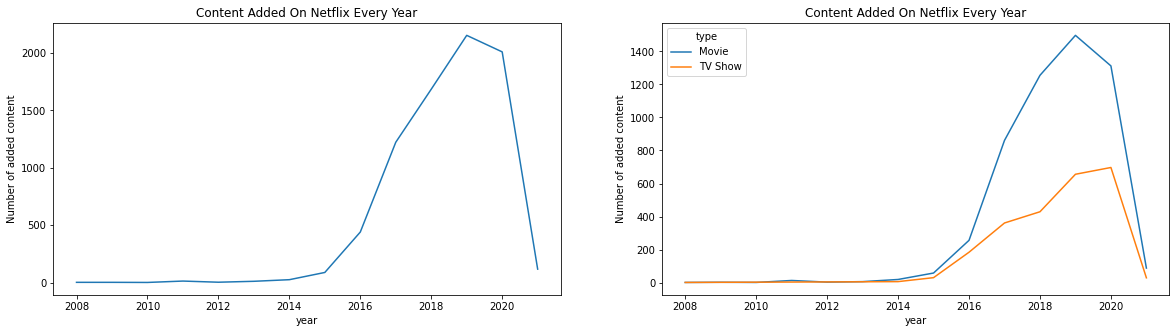

In [114]:
# Ploting to see the content added on netflix every year.
plt.figure(figsize=(20,5))
plt.subplot(121)
Netflix_df.groupby(['added_year'])['type'].count().plot()
plt.xlabel('year')
plt.ylabel('Number of added content')
plt.title('Content Added On Netflix Every Year')
plt.subplot(122)
sns.lineplot(x='added_year', y='Total Count', data=year_df, hue='type')
plt.xlabel('year')
plt.ylabel('Number of added content')
plt.title('Content Added On Netflix Every Year')
plt.show()

* Netflix continuous to add more shows on its platform over the years.
* There is a decrease in the number of shows added in the year 2020, which might be attributed to the covid-19-induced lockdowns, which halted the creation of shows.
* We have Netflix data only up to 16th January 2021, hence there are less movies added in this year

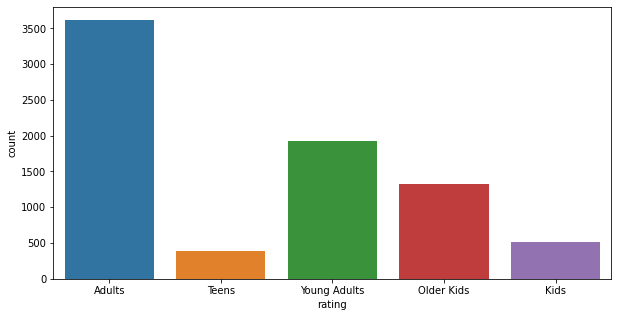

In [113]:
# Age ratings for shows in the dataset
plt.figure(figsize=(10,5))
sns.countplot(x='rating',data=Netflix_df)

* The majority of the shows on Netflix are catered to the needs of adult and young adult population.

###**2. Bivariate Analysis.**

In [154]:
# Choosing the primary country and primary genre to simplify the analysis
#Netflix_df['country'] = Netflix_df['country'].apply(lambda x: x.split(',')[0])
Netflix_df['genres'] = Netflix_df['genres'].apply(lambda x: x.split(',')[0])

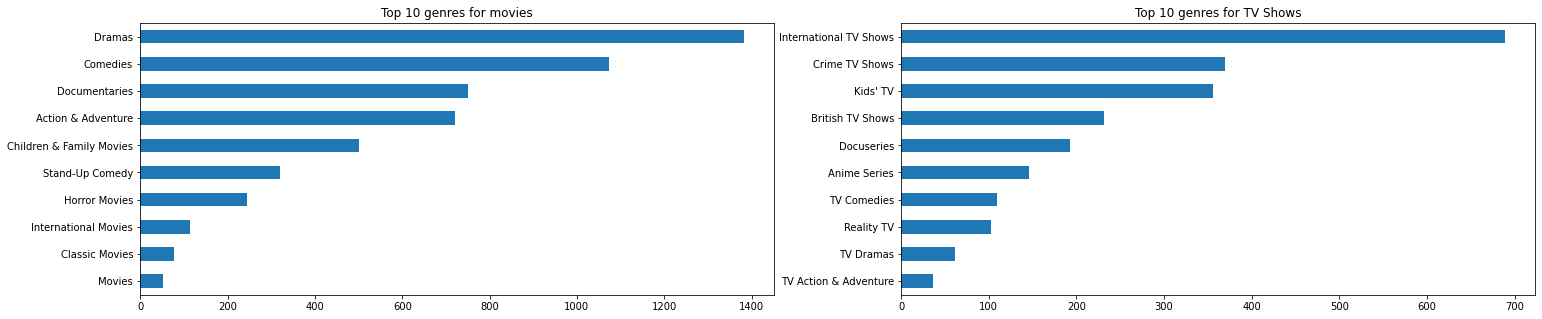

In [166]:
# Top 10 genre for movies
plt.figure(figsize=(25,5))
plt.subplot(121)
Netflix_df[Netflix_df['type']=='Movie'].genres.value_counts().nlargest(10).sort_values(ascending = True).plot(kind='barh')
plt.title('Top 10 genres for movies')

# Top 10 genre for tv shows
plt.subplot(122)
Netflix_df[Netflix_df['type']=='TV Show'].genres.value_counts().nlargest(10).sort_values(ascending = True).plot(kind='barh')
plt.title('Top 10 genres for TV Shows')
plt.show()

* Dramas, comedies, and documentaries are the most popular genre for the movies on Netflix.
* International, crime, and kids are the most popular genre for TV shows on Netflix.

In [103]:
# Seperating most common genres in the form of binary values for better analysis.
netflix_data = Netflix_df.copy()
netflix_data['Action & Adventure'] = netflix_data['genres'].apply(lambda x: 1 if 'Action & Adventure' in x  else 0)
netflix_data['Anime'] = netflix_data['genres'].apply(lambda x: 1 if 'Anime' in x  else 0)
netflix_data['Children & Family'] = netflix_data['genres'].apply(lambda x: 1 if 'Children & Family' in x  else 0)
netflix_data['Classic'] = netflix_data['genres'].apply(lambda x: 1 if 'Classic' in x  else 0)
netflix_data['Comedy'] = netflix_data['genres'].apply(lambda x: 1 if 'Comedy' in x or 'Comedies' in x else 0)
netflix_data['Crime'] = netflix_data['genres'].apply(lambda x: 1 if 'Crime' in x  else 0)
netflix_data['Documentaries'] = netflix_data['genres'].apply(lambda x: 1 if 'Documentaries' in x  else 0)
netflix_data['Horror'] = netflix_data['genres'].apply(lambda x: 1 if 'Horror' in x  else 0)
netflix_data['Romantic'] = netflix_data['genres'].apply(lambda x: 1 if 'Romantic' in x  else 0)
netflix_data['Science'] = netflix_data['genres'].apply(lambda x: 1 if 'Sci-Fi' in x or 'Science' in x else 0)
netflix_data['Thriller'] = netflix_data['genres'].apply(lambda x: 1 if 'Thriller' in x  else 0)
netflix_data['Drama'] = netflix_data['genres'].apply(lambda x: 1 if 'Drama' in x  else 0)

* Now, we will see in the next step the count of movies and TV shows available in neflix with respet to the different genres.

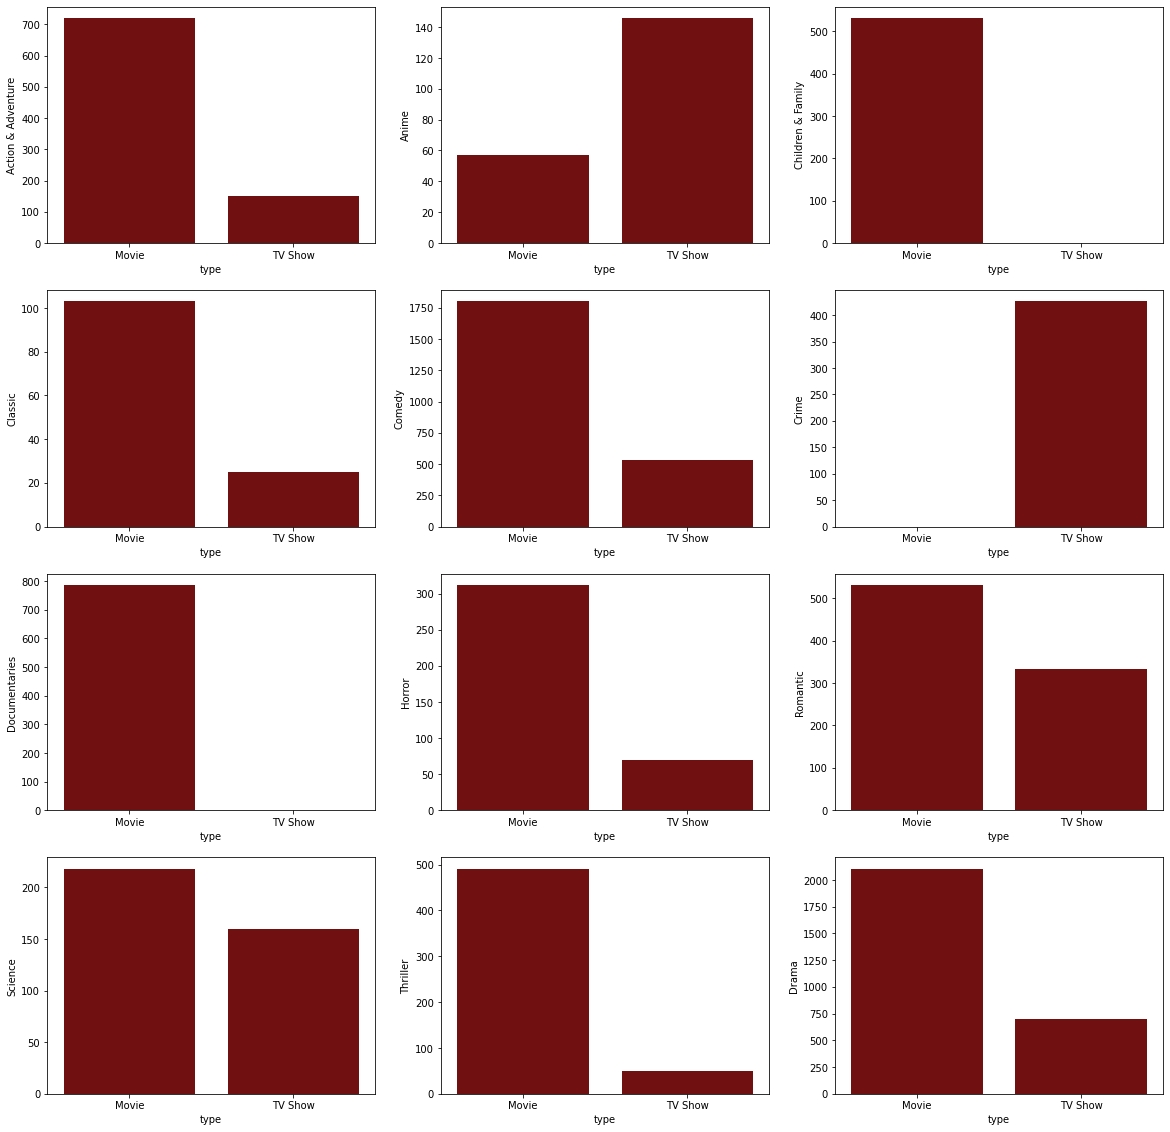

In [104]:
# Let's see the number of content available with respect to diffetent genres.
genres1= ['Action & Adventure','Anime','Children & Family','Classic','Comedy','Crime','Documentaries','Horror','Romantic','Science','Thriller','Drama']
plt.figure(figsize=(20,20))
for index,feature in enumerate(genres1):
    df2 =pd.DataFrame(netflix_data.groupby('type')[feature].sum()).reset_index()
    ax = plt.subplot(4,3,index+1)
    sns.barplot(x='type',y= feature, data=df2, color= 'maroon')
    plt.title('')

* Genres like 'Anime' and 'Crime' has more number of TV shows than movies.
* As we know movies content is more on netflix, thus the movies for different genres is alos high in number.
* Genres like 'Documentaries' and 'Children and Family' no tv shows available only movies are there.

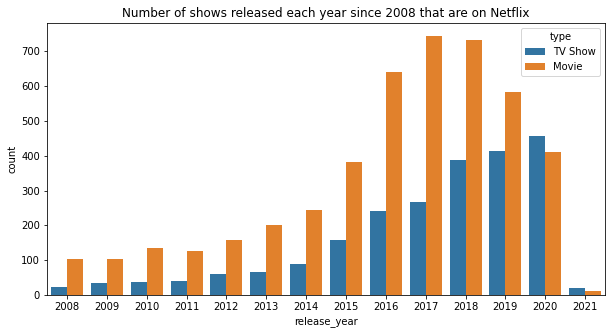

In [158]:
# Number of shows released each year since 2008
order = range(2008,2022)
plt.figure(figsize=(10,5))
sns.countplot(x='release_year',data=df, hue='type',order = order)
plt.title('Number of shows released each year since 2008 that are on Netflix')
plt.xlabel('release_year')
plt.show()

* Over the years, Netflix has consistently focused on adding more shows in its platform.
* Though there was a decrease in the number of movies added in 2020, this pattern did not exist in the number of TV shows added in the same year.
* This might signal that Netflix is increasingly concentrating on introducing more TV series to its platform rather than movies.